# Debiassing Classification Variational Auto Encoder

In [1]:
from setup import Config
from main import make_trainer, make_evaluator
from logger import logger
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils

# Change icons to be notebook compatible
logger.set_notebook_syntax()

## Train a model

### Initialising config & trainer
Create a config file in which we can pass allong the required settings for the training model

In [4]:
# Make a trainer, train
config = Config(run_folder='train', debias_type='max')
trainer = make_trainer(config)

SyntaxError: invalid syntax (<ipython-input-4-a70071a38901>, line 2)

### Review the architecture of the encoder and decoder
First we have a look on the architecture of the encodering and decoding networks

In [3]:
trainer.model

Db_vae(
  (encoder): Encoder(
    (layers): Sequential(
      (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(2, 2))
      (1): LeakyReLU(negative_slope=0.01)
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2))
      (4): LeakyReLU(negative_slope=0.01)
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): Conv2d(128, 256, kernel_size=(5, 5), stride=(2, 2))
      (7): LeakyReLU(negative_slope=0.01)
      (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): Conv2d(256, 512, kernel_size=(5, 5), stride=(2, 2))
      (10): LeakyReLU(negative_slope=0.01)
      (11): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): Flatten()
      (13): Linear(in_features=512, out_features=1000, bias=True)
      (14): LeakyReLU(negative_slope=0.01)
      (15): Linear(in_featur

### Perform the training for 10 epochs

In [ ]:
trainer.train(10)

### Analyse the recreated images by the VAE in a 10 by 10 matrix

In [ ]:
trainer.sample(10)

### Observing the recreation of actual images by the VAE

We can recreate actual images by the VAE.

In [ ]:
trainer.reconstruction_samples()

### Analysing which images are best predicted and worst predicted

We can analyse the best and worst predicted images.

In [ ]:
trainer.best_and_worst()

## Evaluate a model

### Creating an evaluation object
We load in the model from the folder **train**. Set `path_to_model` to any folder in `results/` with a model.pt to load in that corresponding model.

In [ ]:
eval_config = Config(path_to_model='train')
evaluator = make_evaluator(eval_config)

### Perform the actual evaluation

We evaluate the model performance, and save the results in the same area where the model was extracted from.

In [ ]:
evaluator.eval_on_setups("test.csv")

## Our own final results

Included in this notebook is an analysis of our own results for max5, based on the training of 5 different models.

In [2]:
df_final_results = pd.read_csv("paper_results/results.csv")

### Analysis of the Recall of the non-debiased and max-based debiased

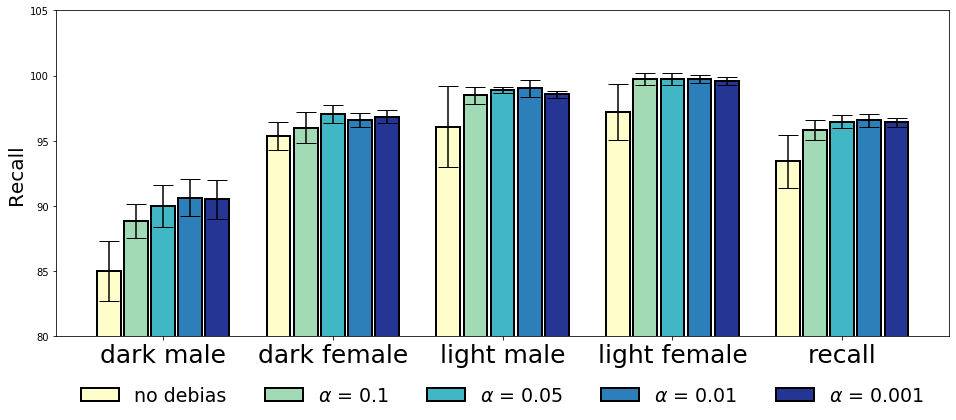

In [3]:
# Recall setup
colors = ["#fffecb", "#a1dab4", "#41b6c4", "#2c7fb8", "#253594"]
training_type = ["no debias", r"$\alpha$ = 0.1", r"$\alpha$ = 0.05", r"$\alpha$ = 0.01", r"$\alpha$ = 0.001"]
setups = ["dark male", "dark female", "light male", "light female", "recall"]
name_list = ["train1_", "train2_", "train3", "train4", "train5"]

utils.make_bar_plot(df_final_results, name_list, setups, training_type=training_type, colors=colors, y_lim=(80, 105), y_label="Recall")

### Precision, Recall and Accuracy of the non-debiased and max-based debiased

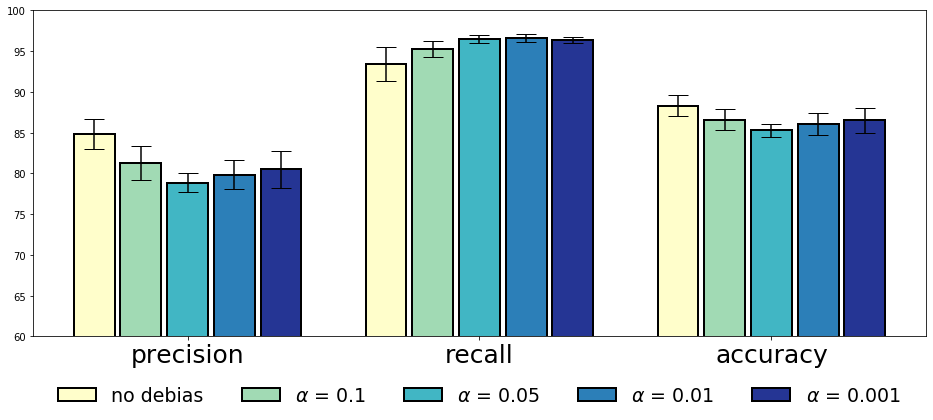

In [4]:
# Setup to extract precision recall and accuracy
colors = ["#fffecb", "#a1dab4", "#41b6c4", "#2c7fb8", "#253594"]
training_type = ["no debias", r"$\alpha$ = 0.1", r"$\alpha$ = 0.05", r"$\alpha$ = 0.01", r"$\alpha$ = 0.001"]
name_list = ["train1_", "train2", "train3", "train4", "train5"]
setups = ["precision", "recall", "accuracy"]

utils.make_bar_plot(df_final_results, name_list, setups, training_type=training_type, colors=colors, y_lim=(60,100))

### Variance of non-debiased, max and gaussian models

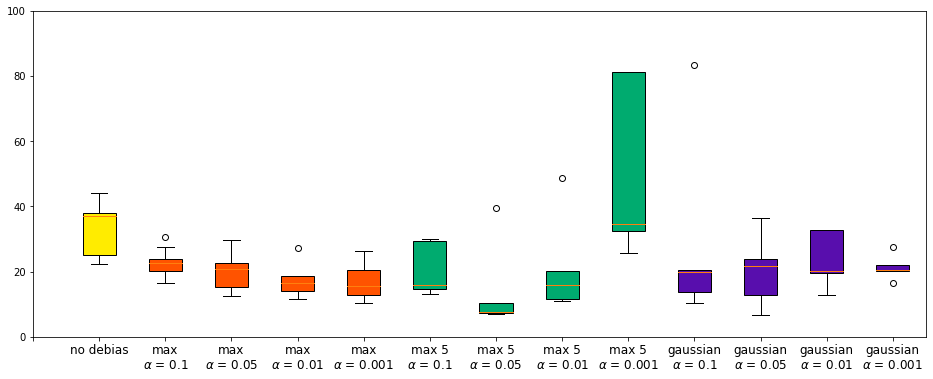

In [6]:
# Define the colors
col1 = '#FFEC00'
col2 = '#FF5300'
col3 = '#00AB6F'
col4 = '#580EAD'
colors = [col1, col2, col2, col2, col2,
                col3, col3, col3, col3,
                col4, col4, col4, col4]

# Define the setup names
name_list = [f"train{i}" for i in [1,2,3,4,5,12,13,14,15,17,18,19,20]]
name_list[0] = "train1_"

t_type = [" ", "no debias", "max\n"+r"$\alpha$ = 0.1", "max\n"+r"$\alpha$ = 0.05", 
                      "max\n"+r"$\alpha$ = 0.01", "max\n"+r"$\alpha$ = 0.001",
                      "max 5\n"+r"$\alpha$ = 0.1", "max 5\n"+r"$\alpha$ = 0.05", 
                      "max 5\n"+r"$\alpha$ = 0.01", "max 5\n"+r"$\alpha$ = 0.001",
                      "gaussian\n"+r"$\alpha$ = 0.1", "gaussian\n"+r"$\alpha$ = 0.05", 
                      "gaussian\n"+r"$\alpha$ = 0.01", "gaussian\n"+r"$\alpha$ = 0.001"]
y_lim = [0, 100]

utils.make_box_plot(df_final_results, name_list, training_type=t_type, colors=colors, y_lim=y_lim)